In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
data = pd.read_csv('TMDB_all_movies.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'TMDB_all_movies.csv'

In [3]:
## THIS IS THE CODE WE RUN TO FILTER OUT THE DATASETS

"""Since the data has a lot of errant variables we're filtering out for movies where it hasn't been released, 
runtime greater than 0, runtime less than 400, we're verifying out variables with a seperate listing which is the IMDB dataset as well
as ensuring there aren't duplicate variables, we're also ensuring our data doesn't have datapoints with a rating of 0 """

# data_cleaned = data.loc[data['revenue'] > 0 ,:]
data_cleaned = data.loc[data['status']=='Released']
data_cleaned = data_cleaned.loc[data['runtime'] > 0, :]
data_cleaned = data_cleaned[data_cleaned['runtime'] <= 400]
data_cleaned = data_cleaned.dropna(subset=['imdb_id'])
data_cleaned = data_cleaned.drop_duplicates(subset=['imdb_id'])
data_cleaned = data_cleaned.loc[data_cleaned['imdb_rating'] > 0]



In [4]:
#We run this to create new data
max_genres = data_cleaned['genres'].str.split(', ', expand=True).shape[1]
genre_cols = [f'genre_{i}' for i in range(1, max_genres + 1)]
# Assign the result to the new columns within tmdb_database
data_cleaned[genre_cols] = data_cleaned['genres'].str.split(', ', expand=True)
data_cleaned = data_cleaned.fillna(value=False)

In [5]:

# Convert all genre columns to string type to avoid mixed-type issues
genre_columns = ['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8','genre_9','genre_10','genre_11']
data_cleaned[genre_columns] = data_cleaned[genre_columns].astype(str)

# Reconstructing the all_genres column
data_cleaned['all_genres'] = data_cleaned[genre_columns].apply(lambda x: ', '.join(x.dropna().replace('nan', '').replace('None', '').replace(' ', '')).strip(', '), axis=1)

# Creating a list of unique genres
unique_genres = set()
data_cleaned['all_genres'].str.split(', ').dropna().apply(unique_genres.update)

# One-hot encoding genres
for genre in unique_genres:
    data_cleaned[genre] = data_cleaned['all_genres'].apply(lambda x: 1 if genre in x else 0)

# Dropping original genre columns
data_cleaned = data_cleaned.drop(columns=genre_columns + ['all_genres'])




In [6]:
data_cleaned.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes', 'poster_path', 'Romance',
       'War', 'Western', 'Thriller', 'Animation', 'Science Fiction',
       'Documentary', 'TV Movie', 'Comedy', 'Drama', 'Family', 'Action',
       'False', 'Fantasy', 'History', 'Music', 'Mystery', 'Adventure',
       'Horror', 'Crime'],
      dtype='object')

In [7]:
data_cleaned.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes', 'poster_path', 'Romance',
       'War', 'Western', 'Thriller', 'Animation', 'Science Fiction',
       'Documentary', 'TV Movie', 'Comedy', 'Drama', 'Family', 'Action',
       'False', 'Fantasy', 'History', 'Music', 'Mystery', 'Adventure',
       'Horror', 'Crime'],
      dtype='object')

In [8]:
data_cleaned   

id                             title  vote_average  vote_count  \
0              2                             Ariel           7.1       339.0   
1              3               Shadows in Paradise           7.3       402.0   
2              5                        Four Rooms           5.9      2656.0   
3              6                    Judgment Night           6.5       333.0   
4              8  Life in Loops (A Megacities RMX)           7.5        27.0   
...          ...                               ...           ...         ...   
1051491  1429178                 Mexican Diplomats           0.0         0.0   
1051497  1429184                   Murder of Nancy           0.0         0.0   
1051516  1429203           Terminator: Termination           0.0         0.0   
1051537  1429224                        Rhino King           0.0         0.0   
1051652  1429353                   Life Begins Now           0.0         0.0   

           status release_date     revenue  runtime      budget     imdb_id  \
0        Released   1988-10-21         0.0     73.0         0.0   tt0094675   
1        Released   1986-10-17         0.0     74.0         0.0   tt0092149   
2        Released   1995-12-09   4257354.0     98.0   4000000.0   tt0113101   
3        Released   1993-10-15  12136938.0    109.0  21000000.0   tt0107286   
4        Released   2006-01-01         0.0     80.0     42000.0   tt0825671   
...           ...          ...         ...      ...         ...         ...   
1051491  Released   1932-12-25         0.0     63.0         0.0   tt0359680   
1051497  Released        False         0.0     95.0         0.0  tt20771702   
1051516  Released   2012-04-18         0.0      6.0         0.0   tt2076347   
1051537  Released   2025-01-01         0.0     80.0         0.0  tt32397514   
1051652  Released        False         0.0     84.0         0.0   tt5552086   

         ... Family Action False  Fantasy History Music Mystery Adventure  \
0        ...      0      0     1        0       0     0       0         0   
1        ...      0      0     1        0       0     0       0         0   
2        ...      0      0     1        0       0     0       0         0   
3        ...      0      1     1        0       0     0       0         0   
4        ...      0      0     1        0       0     0       0         0   
...      ...    ...    ...   ...      ...     ...   ...     ...       ...   
1051491  ...      0      0     1        0       0     0       0         0   
1051497  ...      0      0     1        0       0     0       0         0   
1051516  ...      0      1     1        0       0     0       0         0   
1051537  ...      0      0     1        0       0     0       0         0   
1051652  ...      0      0     1        0       0     0       0         0   

        Horror Crime  
0            0     1  
1            0     0  
2            0     0  
3            0     1  
4            0     0  
...        ...   ...  
1051491      0     0  
1051497      0     0  
1051516      0     0  
1051537      0     0  
1051652      0     0  

[390962 rows x 48 columns]

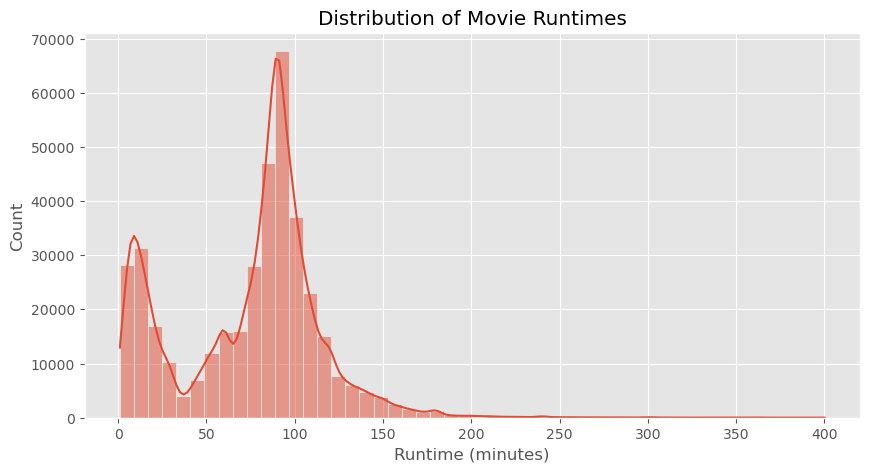

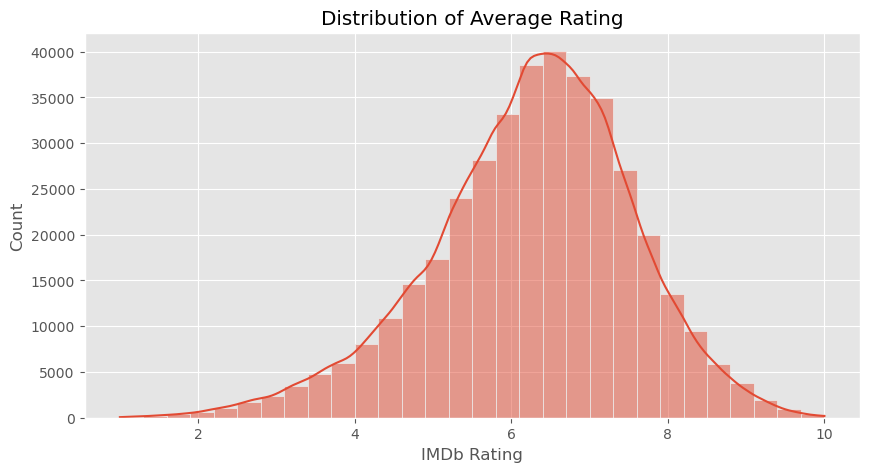

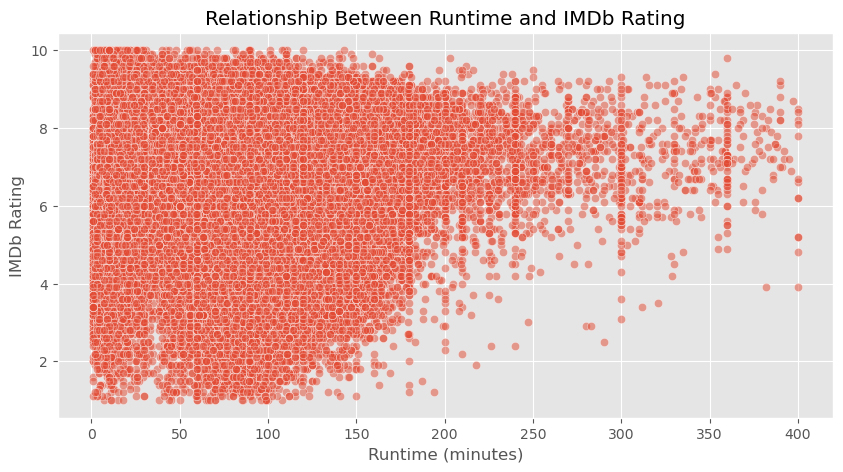

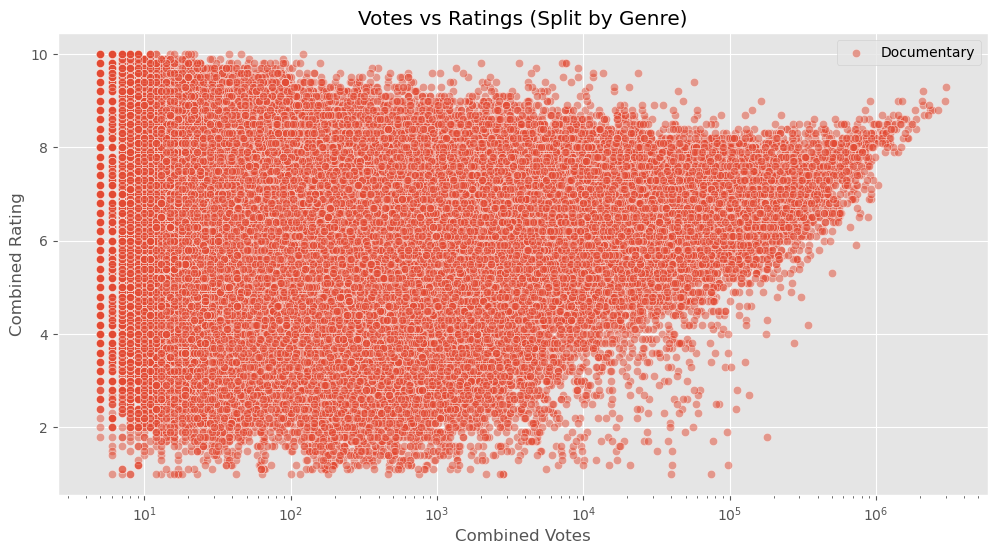

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Plot distribution of movie runtimes
plt.figure(figsize=(10,5))
sns.histplot(data_cleaned['runtime'], bins=50, kde=True)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie Runtimes")
plt.show()

# Plot distribution of IMDb ratings
plt.figure(figsize=(10,5))
sns.histplot(data_cleaned['imdb_rating'], bins=30, kde=True)
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.title("Distribution of Average Rating")
plt.show()

# Scatter plot to show relationship between runtime and IMDb ratings
plt.figure(figsize=(10,5))
sns.scatterplot(x=data_cleaned['runtime'], y=data_cleaned['imdb_rating'], alpha=0.5)
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Rating")
plt.title("Relationship Between Runtime and IMDb Rating")
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x=data_cleaned['imdb_votes'], y=data_cleaned['imdb_rating'], alpha=0.5)
plt.xlabel("Combined Votes")
plt.ylabel("Combined Rating")
plt.xscale('log')  # Log scale for better visualization
plt.title("Votes vs Ratings")
plt.legend()
plt.show()


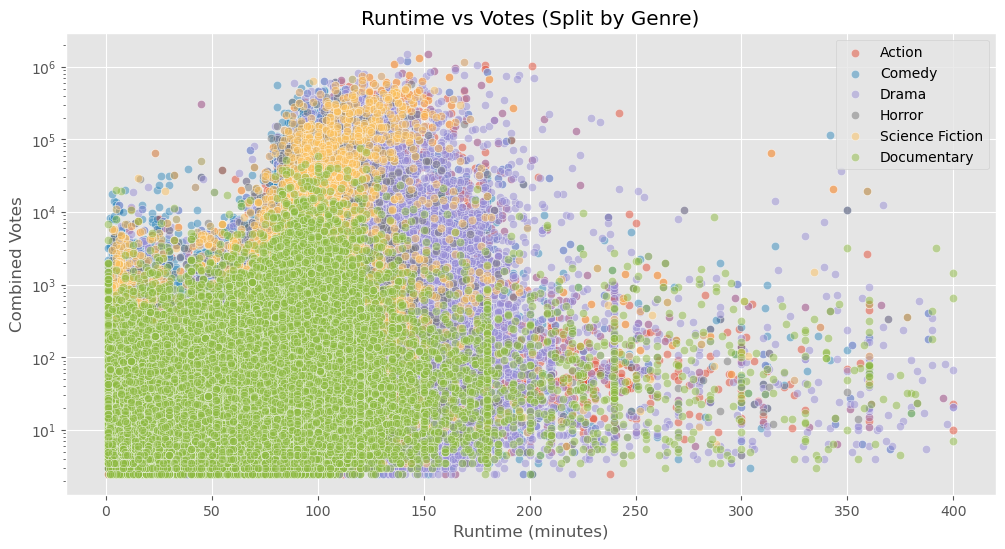

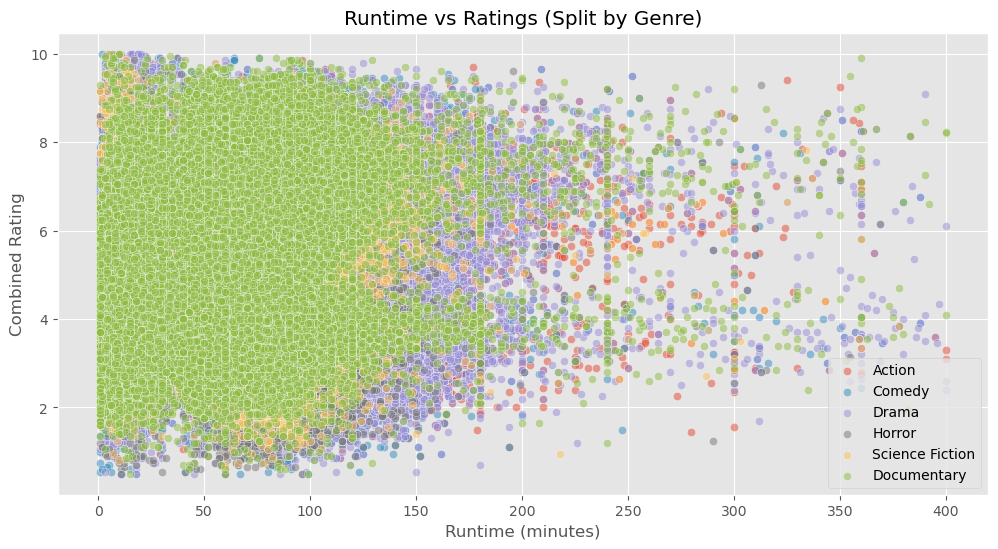

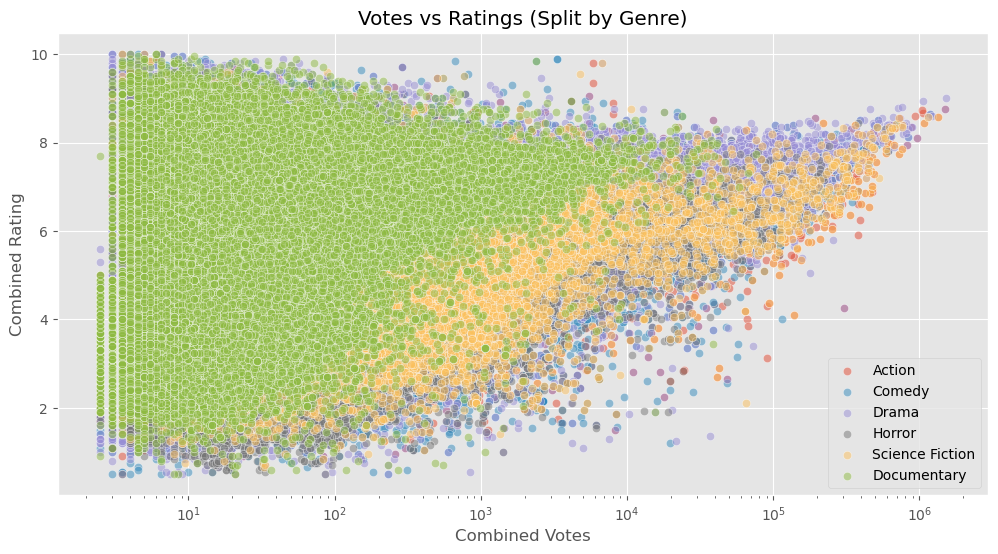

In [154]:
# 1. Runtime vs Votes (Split by Genre)
plt.figure(figsize=(12,6))
for genre in selected_genres:
    subset = data_cleaned[data_cleaned[genre] == 1]
    sns.scatterplot(x=subset['runtime'], y=subset['combined_average_votes'], alpha=0.5, label=genre)

plt.xlabel("Runtime (minutes)")
plt.ylabel("Combined Votes")
plt.yscale('log')  # Log scale to handle large differences
plt.title("Runtime vs Votes (Split by Genre)")
plt.legend()
plt.show()

# 2. Runtime vs Ratings (Split by Genre)
plt.figure(figsize=(12,6))
for genre in selected_genres:
    subset = data_cleaned[data_cleaned[genre] == 1]
    sns.scatterplot(x=subset['runtime'], y=subset['combined_rating'], alpha=0.5, label=genre)

plt.xlabel("Runtime (minutes)")
plt.ylabel("Combined Rating")
plt.title("Runtime vs Ratings (Split by Genre)")
plt.legend()
plt.show()

# 3. Votes vs Ratings (Split by Genre)
plt.figure(figsize=(12,6))
for genre in selected_genres:
    subset = data_cleaned[data_cleaned[genre] == 1]
    
plt.figure(figsize=(12,6))
sns.scatterplot(x=subset['combined_average_votes'], y=subset['combined_rating'], alpha=0.5, label=genre)
plt.xlabel("Combined Votes")
plt.ylabel("Combined Rating")
plt.xscale('log')  # Log scale for better visualization
plt.title("Votes vs Ratings (Split by Genre)")
plt.legend()
plt.show()


In [155]:
# Identify genre columns (after one-hot encoding transformation)
genre_columns = [col for col in data_cleaned.columns if col not in ['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count', 
                                                           'status', 'release_date', 'revenue', 'runtime', 'budget', 
                                                           'imdb_id', 'original_language', 'original_title', 'overview', 
                                                           'popularity', 'tagline', 'genres', 'production_companies', 
                                                           'production_countries', 'spoken_languages', 'cast', 'director', 
                                                           'director_of_photography', 'writers', 'producers', 
                                                           'music_composer', 'imdb_rating', 'imdb_votes', 'poster_path', 
                                                           'tconst', 'averageRating', 'numVotes', 'Average_Rating', 
                                                           'combined_rating', 'combined_votes']]

# Sorting the genres for better readability
genre_list = sorted(genre_columns)

# Display the list of genres
genre_list


['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'False',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'combined_average_votes',
 'genre_10',
 'genre_11',
 'genre_12',
 'genre_13',
 'genre_14',
 'genre_15',
 'genre_16',
 'genre_17',
 'genre_9']

In [156]:
data_cleaned.drop(columns='genre_9', inplace = True)

In [ ]:

# # Identify genre columns (one-hot encoded)
# genre_columns = ['Western', 'Fantasy', 'Horror', 'Comedy', 'Thriller', 'Romance',
#                  'Science Fiction', 'TV Movie', 'War', 'Mystery', 'Crime', 
#                  'Adventure', 'History', 'Action', 'Documentary', 'Family', 
#                  'Animation', 'Music', 'Drama']

# # Define a color palette
# colors = sns.color_palette("husl", len(genre_columns))  # Generates unique colors for each genre

# # Loop through each genre and generate scatter plots
# for i, genre in enumerate(genre_columns):
#     subset = data_cleaned[data_cleaned[genre] == 1]  # Filter movies belonging to the genre
    
#     if subset.shape[0] > 50:  # Ensure enough data points for meaningful visualization
        
#         # Scatter plot: Runtime vs Average Rating
#         plt.figure(figsize=(10,5))
#         sns.scatterplot(x=subset['runtime'], y=subset['averageRating'], color=colors[i], alpha=0.6)
#         plt.xlabel("Runtime (minutes)")
#         plt.ylabel("Average Rating")
#         plt.title(f"Runtime vs Average Rating for {genre} Movies")
#         plt.show()

#         # Scatter plot: Runtime vs Number of Votes
#         plt.figure(figsize=(10,5))
#         sns.scatterplot(x=subset['runtime'], y=subset['numVotes'], color=colors[i], alpha=0.6)
#         plt.xlabel("Runtime (minutes)")
#         plt.ylabel("Number of Votes")
#         plt.yscale('log')  # Log scale for better visualization
#         plt.title(f"Runtime vs Number of Votes for {genre} Movies")
#         plt.show()


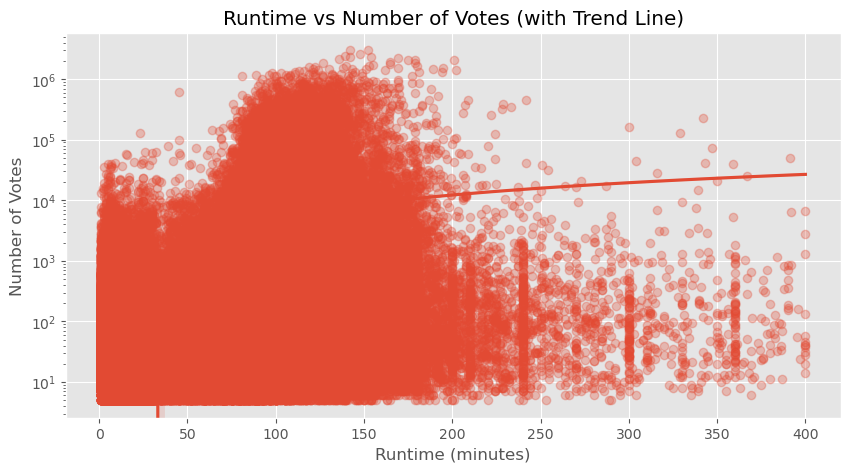

In [21]:
plt.figure(figsize=(10,5))
sns.regplot(x=data_cleaned['runtime'], y=data_cleaned['imdb_votes'], scatter_kws={'alpha':0.3})
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Votes")
plt.yscale('log')  # Log scale helps with large differences
plt.title("Runtime vs Number of Votes (with Trend Line)")
plt.show()


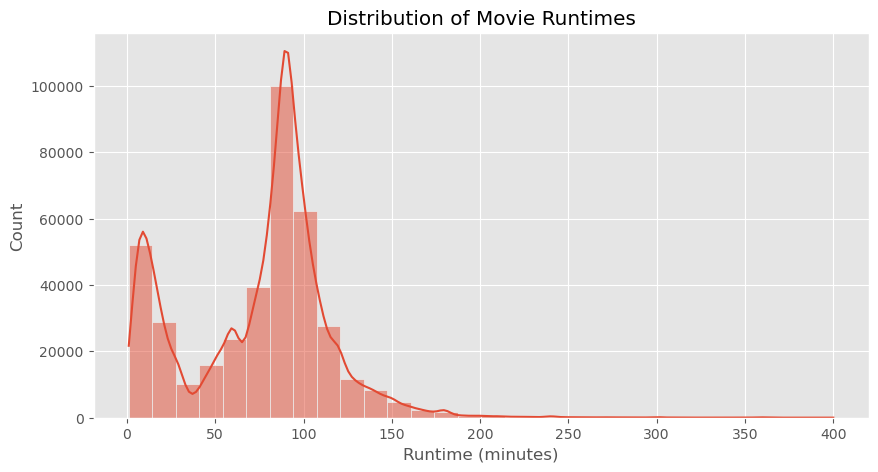

In [160]:
plt.figure(figsize=(10,5))
sns.histplot(data_cleaned['runtime'], bins=30, kde=True)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie Runtimes")
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=data_cleaned['runtime'], y=data_cleaned['imdb_rating'], scatter_kws={'alpha':0.3})
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")  # Log scale helps with large differences
plt.title("Runtime vs Average_rating (with Trend Line)")
plt.show()


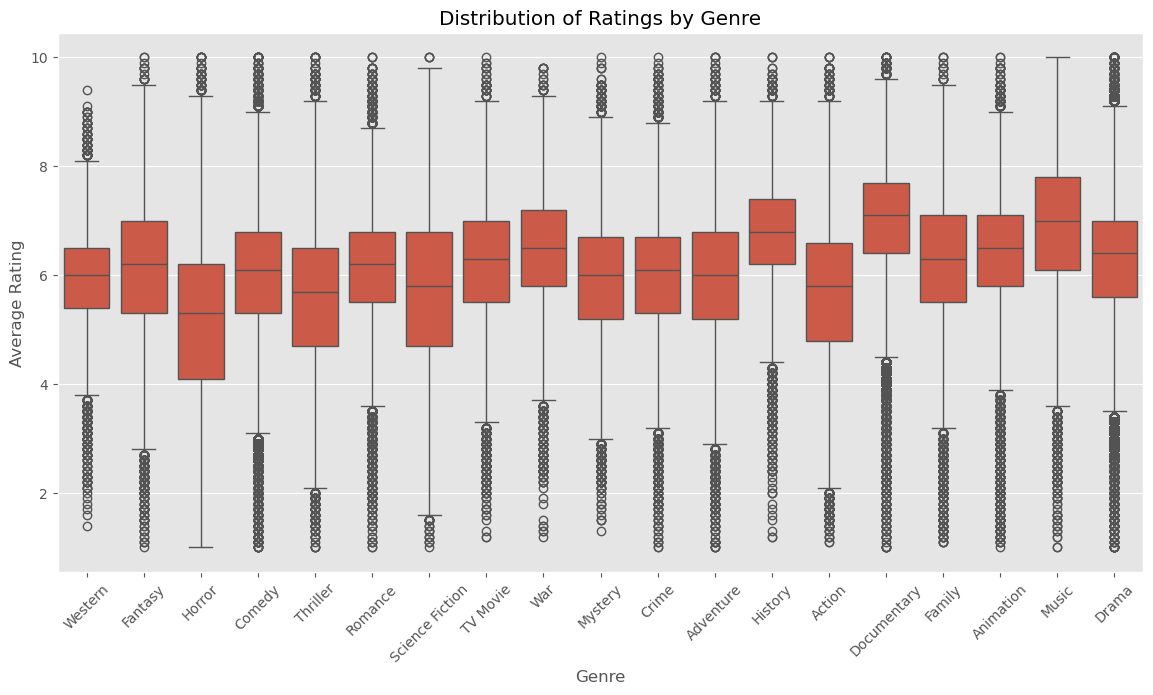

In [ ]:

# Define genres
selected_genres = ['Western', 'Fantasy', 'Horror', 'Comedy', 'Thriller', 'Romance',
                 'Science Fiction', 'TV Movie', 'War', 'Mystery', 'Crime', 
                 'Adventure', 'History', 'Action', 'Documentary', 'Family', 
                 'Animation', 'Music', 'Drama']

# Melt the dataset to convert genres into a long format
df_genre_melted = data_cleaned.melt(id_vars=['averageRating'], value_vars=selected_genres, var_name='Genre', value_name='Is_Genre')

# Filter only rows where the genre is present
df_genre_filtered = df_genre_melted[df_genre_melted['Is_Genre'] == 1]

# Plot the distribution of ratings by genre
plt.figure(figsize=(14,7))
sns.boxplot(x='Genre', y='averageRating', data=df_genre_filtered)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Distribution of Ratings by Genre")
plt.xticks(rotation=45)
plt.show()


In [ ]:


# Define genres
selected_genres = ['Western', 'Fantasy', 'Horror', 'Comedy', 'Thriller', 'Romance',
                 'Science Fiction', 'TV Movie', 'War', 'Mystery', 'Crime', 
                 'Adventure', 'History', 'Action', 'Documentary', 'Family', 
                 'Animation', 'Music', 'Drama']

# Melt the dataset to convert genres into a long format
df_genre_melted = data_cleaned.melt(id_vars=['averageRating'], value_vars=selected_genres, var_name='Genre', value_name='Is_Genre')

# Filter only rows where the genre is present
df_genre_filtered = df_genre_melted[df_genre_melted['Is_Genre'] == 1]

# Compute the average rating per genre
genre_avg_ratings = df_genre_filtered.groupby('Genre')['averageRating'].mean().reset_index()

# Sort by average rating (descending)
genre_avg_ratings = genre_avg_ratings.sort_values(by='averageRating', ascending=False)

# Plot the average ratings per genre
plt.figure(figsize=(14,7))
sns.barplot(x='Genre', y='averageRating', data=genre_avg_ratings, palette="coolwarm")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating per Genre")
plt.xticks(rotation=45)
plt.show()



In [ ]:
plt.figure(figsize=(14,7))
selected_genres = ['Western', 'Fantasy', 'Horror', 'Comedy', 'Thriller', 'Romance',
                 'Science Fiction', 'TV Movie', 'War', 'Mystery', 'Crime', 
                 'Adventure', 'History', 'Action', 'Documentary', 'Family', 
                 'Animation', 'Music', 'Drama']
df_genre_melted = data_cleaned.melt(id_vars=['runtime', 'averageRating'], value_vars=selected_genres, var_name='Genre', value_name='Is_Genre')
df_genre_filtered = df_genre_melted[df_genre_melted['Is_Genre'] == 1]



sns.boxplot(x='Genre', y='runtime', data=df_genre_filtered)
plt.xlabel("Genre")
plt.ylabel("Runtime (minutes)")
plt.title("Runtime Distribution by Genre")
plt.xticks(rotation=45)
plt.show()




In [ ]:
# Identify genre columns (one-hot encoded)
genre_columns = ['Western', 'Fantasy', 'Horror', 'Comedy', 'Thriller', 'Romance',
                 'Science Fiction', 'TV Movie', 'War', 'Mystery', 'Crime', 
                 'Adventure', 'History', 'Action', 'Documentary', 'Family', 
                 'Animation', 'Music', 'Drama']

# Define a color palette
colors = sns.color_palette("husl", len(genre_columns))  # Generates unique colors for each genre

# Dictionaries to store average runtime, ratings, and votes per genre
genre_runtime_ratings = {}
genre_runtime_votes = {}

# Loop through each genre and generate scatter & bar plots
for i, genre in enumerate(genre_columns):
    subset =data_cleaned[data_cleaned[genre] == 1]  # Filter movies belonging to the genre
    
    if subset.shape[0] > 50:  # Ensure enough data points for meaningful visualization
        
        # Scatter plot: Runtime vs Average Rating
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=subset['runtime'], y=subset['averageRating'], color=colors[i], alpha=0.6)
        plt.xlabel("Runtime (minutes)")
        plt.ylabel("Average Rating")
        plt.title(f"Runtime vs Average Rating for {genre} Movies")
        plt.show()

        # Scatter plot: Runtime vs Number of Votes
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=subset['runtime'], y=subset['numVotes'], color=colors[i], alpha=0.6)
        plt.xlabel("Runtime (minutes)")
        plt.ylabel("Number of Votes")
        plt.yscale('log')  # Log scale for better visualization
        plt.title(f"Runtime vs Number of Votes for {genre} Movies")
        plt.show()

        # Store average runtime vs ratings and votes for bar plots
        genre_runtime_ratings[genre] = subset[['runtime', 'averageRating']].mean()
        genre_runtime_votes[genre] = subset[['runtime', 'numVotes']].mean()

# Convert to DataFrames for plotting
runtime_ratings_df = pd.DataFrame.from_dict(genre_runtime_ratings, orient='index')
runtime_votes_df = pd.DataFrame.from_dict(genre_runtime_votes, orient='index')

# Bar Plot: Average Runtime vs Average Rating
plt.figure(figsize=(12,6))
sns.barplot(x=runtime_ratings_df.index, y=runtime_ratings_df['averageRating'], palette="husl")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Runtime vs Average Rating by Genre")
plt.show()

# Bar Plot: Average Runtime vs Average Votes
plt.figure(figsize=(12,6))
sns.barplot(x=runtime_votes_df.index, y=runtime_votes_df['numVotes'], palette="husl")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Number of Votes")
plt.yscale('log')  # Log scale for better visualization
plt.title("Average Runtime vs Number of Votes by Genre")
plt.show()



Regression Results: Runtime → Votes
                            OLS Regression Results                            
Dep. Variable:             imdb_votes   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                 5.774e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:19:34   Log-Likelihood:            -7.9652e+05
No. Observations:              390962   AIC:                         1.593e+06
Df Residuals:                  390960   BIC:                         1.593e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

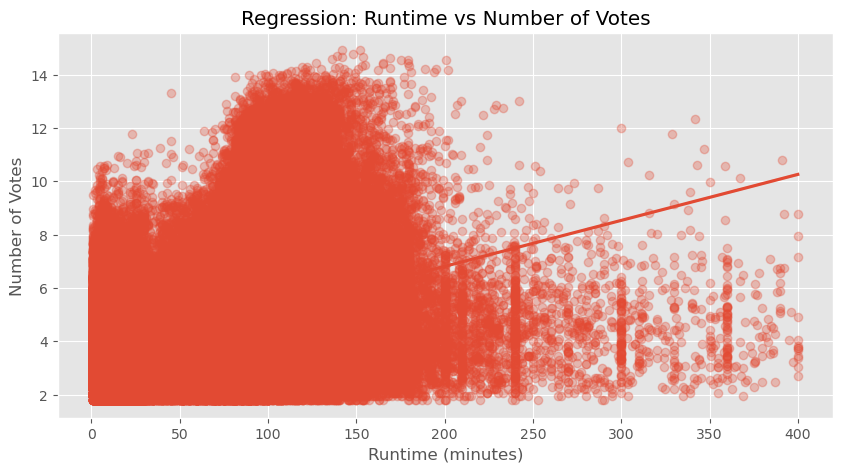

In [27]:
# Import required libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values for a cleaner regression
df = data_cleaned.dropna(subset=['runtime', 'imdb_rating', 'imdb_votes'])

# # 1️⃣ Regression: Runtime → Ratings
X = sm.add_constant(df['runtime'])  # Adding constant for intercept
# y = df['imdb_rating']
# model_rating = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
# print("Regression Results: Runtime → Ratings")
# print(model_rating.summary())

#df['log_votes'] = np.log1p(df['numVotes'])
# 2️⃣ Regression: Runtime → Votes
y_votes = np.log1p(df['imdb_votes'])
model_votes = sm.OLS(y_votes, X).fit()
print("\nRegression Results: Runtime → Votes")
print(model_votes.summary())

# # Scatter plot with regression line for Ratings
# plt.figure(figsize=(10,5))
# sns.regplot(x=df['runtime'], y=df['imdb_rating'], scatter_kws={'alpha':0.3})
# plt.xlabel("Runtime (minutes)")
# plt.ylabel("Average Rating")
# plt.title("Regression: Runtime vs Ratings")
# plt.show()

# Scatter plot with regression line for Votes
plt.figure(figsize=(10,5))
sns.regplot(x=df['runtime'], y= y_votes, scatter_kws={'alpha':0.3})
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Votes")
plt.title("Regression: Runtime vs Number of Votes")
plt.show()


Regression Results: Runtime → Ratings
                            OLS Regression Results                            
Dep. Variable:            imdb_rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     978.8
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.33e-214
Time:                        16:21:18   Log-Likelihood:            -6.5628e+05
No. Observations:              390962   AIC:                         1.313e+06
Df Residuals:                  390960   BIC:                         1.313e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

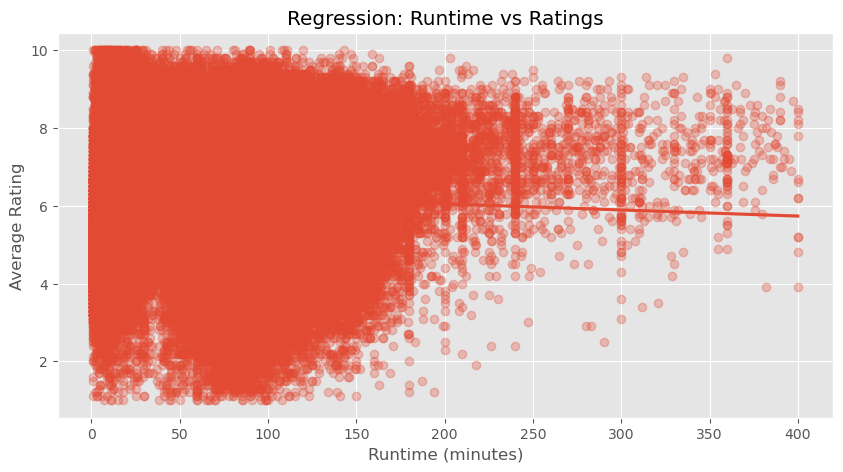

In [28]:
# 1️⃣ Regression: Runtime → Ratings
X = sm.add_constant(df['runtime'])  # Adding constant for intercept
y = df['imdb_rating']
model_rating = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
print("Regression Results: Runtime → Ratings")
print(model_rating.summary())


# Scatter plot with regression line for Ratings
plt.figure(figsize=(10,5))
sns.regplot(x=df['runtime'], y=df['imdb_rating'], scatter_kws={'alpha':0.3})
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.title("Regression: Runtime vs Ratings")
plt.show()


In [10]:
finance = pd.read_csv('Top Movies (Cleaned Data).csv')

In [11]:
apple = 123